# (D) The Two-Body Problem

In [1]:
# This cell runs the file "Two_body_functions.ipynb" such that the functions in that file can be utillized here
%run ./Two_body_functions.ipynb

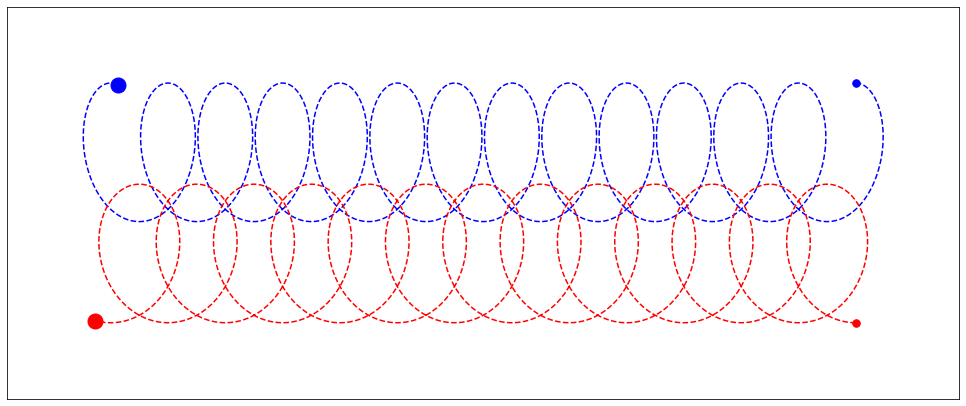

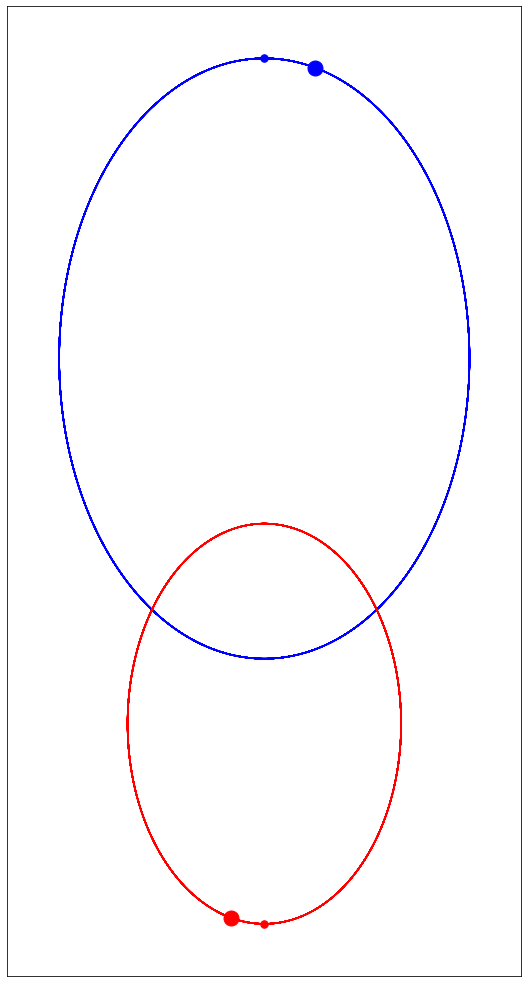

In [2]:
x_1 = np.array([0., 1000.])
x_2 = np.array([0., -200.])
v_1 = np.array([0.005, 0.])
v_2 = np.array([-0.01, 0.])
a_1 = np.array([0.,    0.])
a_2 = np.array([0.,    0.])
m_1 = 10
m_2 = 15

s = x_1, x_2, v_1, v_2, a_1, a_2, m_1, m_2

pos1, pos2, posCM, vel1, vel2, acc1, acc2 = twoOrbsNewt(s, t_max = 1500000, dt = 10)
# twoOrbPlotter(pos1, pos2, posCM, CM = False, filename='TB04 rest_frame', save=False, show=False)
# twoOrbPlotter(pos1, pos2, posCM, CM = True, filename='TB04 CM_frame', save=False, show=False)
prettyTwoOrbPlotter(pos1, pos2, posCM, CM = False, filename='TB04 rest_frame', save=True)
prettyTwoOrbPlotter(pos1, pos2, posCM, CM = True, filename='TB04 CM_frame', save=True)

We want to solve the trajectories of two masses given their masses $m_1$ and $m_2$ and their initial conditions $(r_1,p_1)$ and $(r_2,p_2)$. It has been shown on many occasions that this problem reduces to a one-body problem of a reduced mass $\mu$ in a central potential in the center of mass frame. Thus, given the masses and initial conditions in the two-body fram we want to do the transformation

$$ \mathbf R = \frac{m_1 \mathbf r_1 + m_2 \mathbf r_2}{m_1 + m_2}, \qquad \mathbf V = \dot{\mathbf R} = \frac{m_1 \mathbf v_1 + m_2 \mathbf v_2}{m_1 + m_2}, \qquad \text{and} \qquad \mu = \frac{m_1 m_2}{m_1 + m_2}$$

Then calculate the orbitals, and then do the transformation back


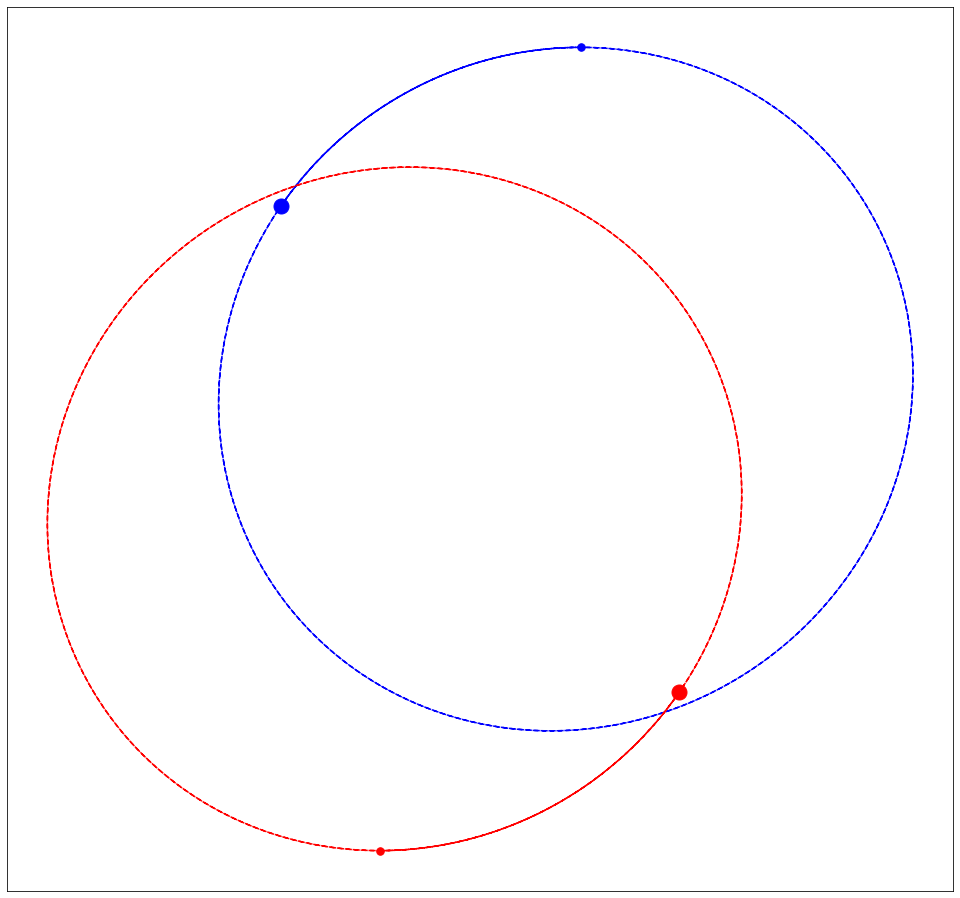

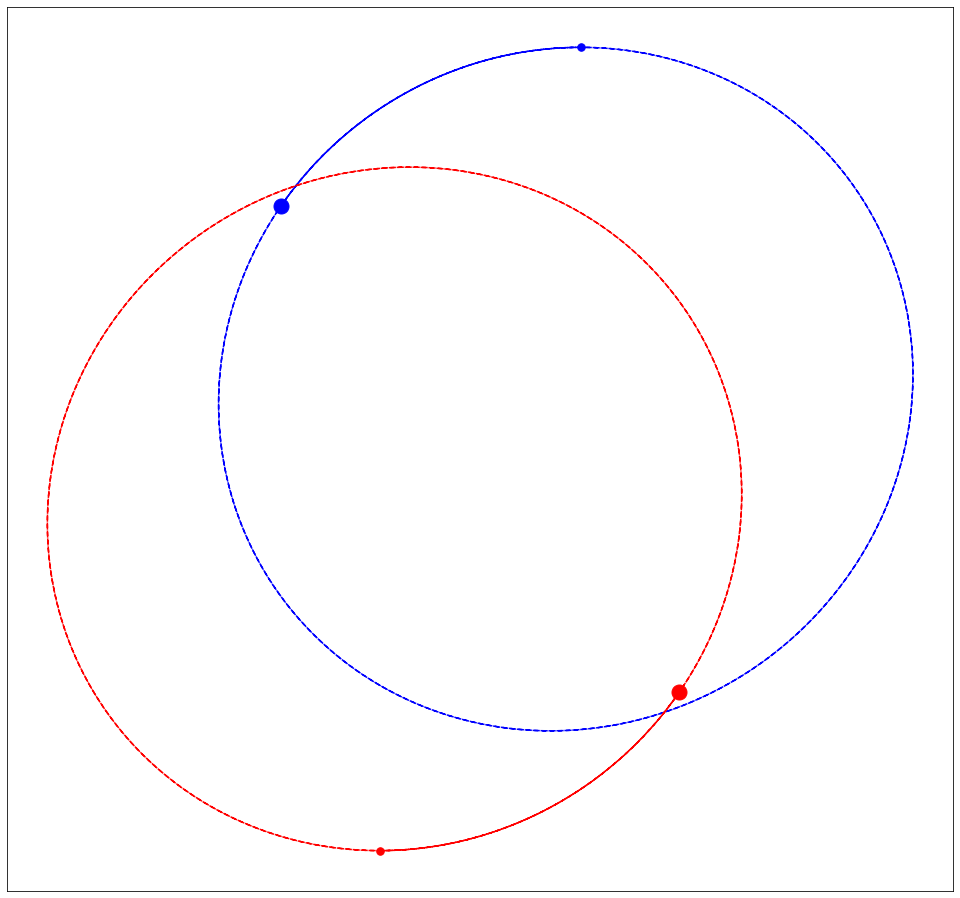

In [3]:
# Defining initial states in rest frame
m_1 = 10
x_1 = np.array([500., 1000.])
v_1 = np.array([-0.01, 0.])
a_1 = np.array([0.,    0.])

m_2 = 10
x_2 = np.array([0.,-1000.])
v_2 = np.array([0.01, 0.])
a_2 = np.array([0.,    0.])

s = x_1, x_2, v_1, v_2, a_1, a_2, m_1, m_2

pos1, pos2, posCM, vel1, vel2, acc1, acc2 = twoOrbsNewt(s, t_max=1000000, dt=100)
twoOrbPlotter(pos1, pos2, posCM, filename='TB02 rest_frame', CM=False, save=False)
twoOrbPlotter(pos1, pos2, posCM, filename='TB02 CM_frame', CM=True, save=False)
# prettyTwoOrbPlotter(pos1, pos2, posCM, filename='TB02 rest_frame', CM=False, save=True)
# prettyTwoOrbPlotter(pos1, pos2, posCM, filename='TB02 CM_frame', CM=True, save=True)

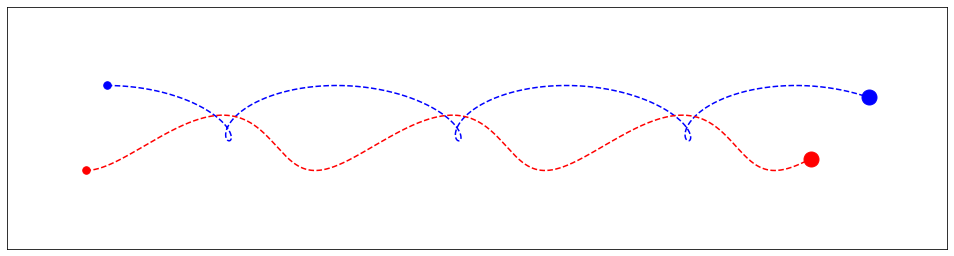

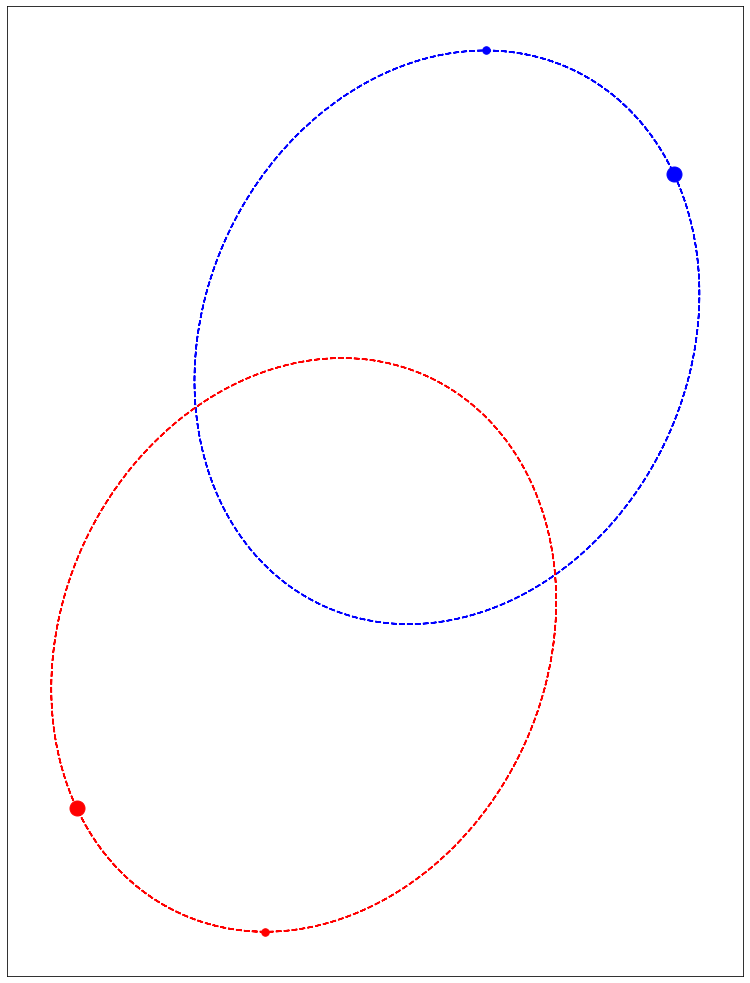

In [4]:
# Defining initial states in rest frame
m_1 = 10
x_1 = np.array([500., 1000.])
v_1 = np.array([0.025, 0.])
a_1 = np.array([0.,    0.])

m_2 = 10
x_2 = np.array([0.,-1000.])
v_2 = np.array([0.01, 0.])
a_2 = np.array([0.,    0.])

s = x_1, x_2, v_1, v_2, a_1, a_2, m_1, m_2

pos1, pos2, posCM, vel1, vel2, acc1, acc2 = twoOrbsNewt(s, t_max=1000000, dt=100)
# twoOrbPlotter(pos1, pos2, posCM, filename='TB03 rest_frame', CM=False, save=True)
# twoOrbPlotter(pos1, pos2, posCM, filename='TB03 CM_frame', CM=True, save=True)
prettyTwoOrbPlotter(pos1, pos2, posCM, filename='TB03 rest_frame', CM=False, save=True)
prettyTwoOrbPlotter(pos1, pos2, posCM, filename='TB03 CM_frame', CM=True, save=True)

# TWO BODY PROBLEM EINSTEIN-INFELD-HOFFMANN

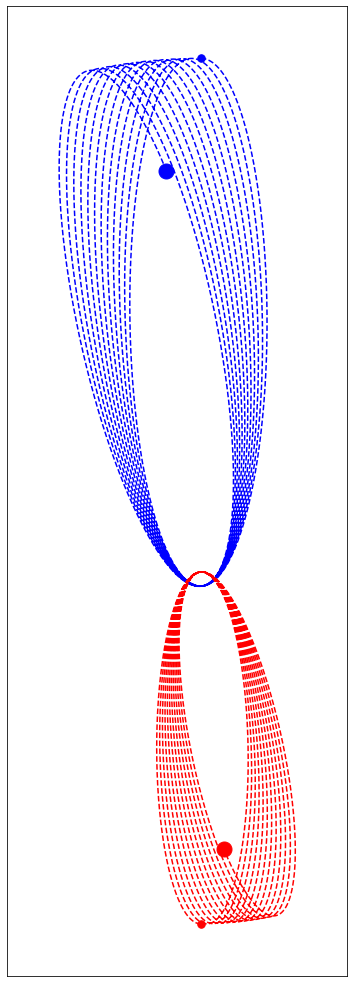

In [5]:
x_1 = np.array([0., 1000.])
x_2 = np.array([0.,-1000.])
v_1 = np.array([0.01,  0.])
v_2 = np.array([-0.01, 0.])
a_1 = np.array([0.,    0.])
a_2 = np.array([0.,    0.])
m_1 = 10
m_2 = 15

s = x_1, x_2, v_1, v_2, a_1, a_2, m_1, m_2

pos1, pos2, posCM, vel1, vel2, acc1, acc2 = twoOrbsEIH(s, t_max = 500000, dt = 10)
# twoOrbPlotter(pos1, pos2, posCM, CM = False, filename='EIH1 rest_frame', save=False)
# twoOrbPlotter(pos1, pos2, posCM, CM = True, filename='EIH1 CM_frame', save=False)
prettyTwoOrbPlotter(pos1, pos2, posCM, CM = True, filename='EIH1 CM_frame', save=True)

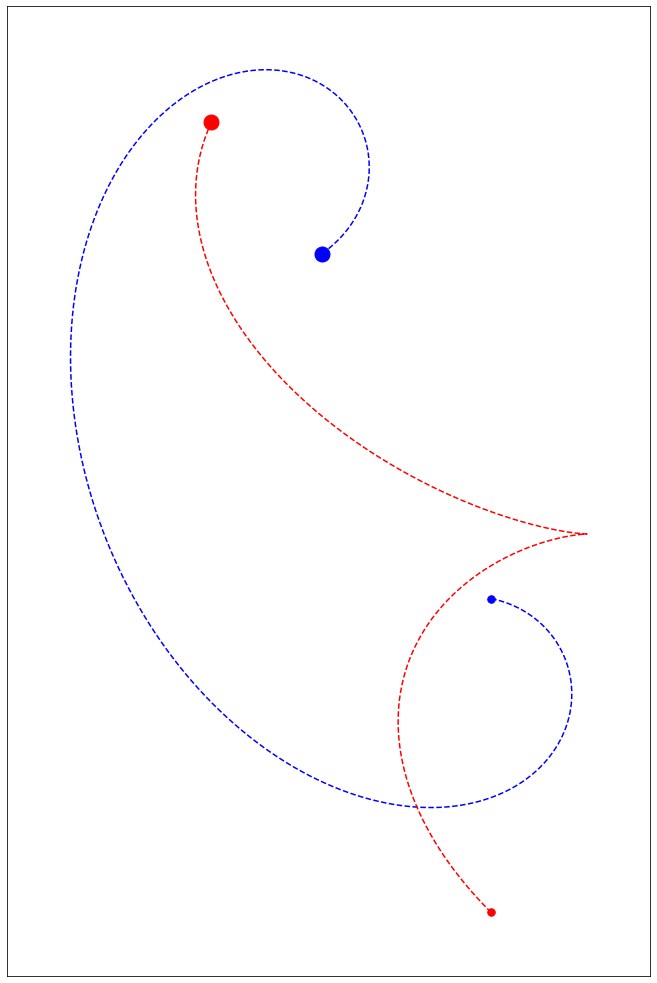

In [6]:
x_1 = np.array([0., 1000.])
x_2 = np.array([0.,-1000.])
v_1 = np.array([0.05,  -0.01])
v_2 = np.array([-0.05, 0.05])
a_1 = np.array([0.,    0.])
a_2 = np.array([0.,    0.])
m_1 = 10
m_2 = 15

s = x_1, x_2, v_1, v_2, a_1, a_2, m_1, m_2

pos1, pos2, posCM, vel1, vel2, acc1, acc2 = twoOrbsEIH(s, t_max = 150000, dt = 1)
# twoOrbPlotter(pos1, pos2, posCM, CM = False, filename='EIH3 rest_frame', save=False)
# twoOrbPlotter(pos1, pos2, posCM, CM = True, filename='EIH3 CM_frame', save=False)
prettyTwoOrbPlotter(pos1, pos2, posCM, CM = False, filename='EIH3 rest_frame', save=True)

# ANIMATION

In [9]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation

# pos1, pos2, posCM, vel1, vel2, acc1, acc2 = twoOrbsEIH(s, t_max = 450000, dt = 1)

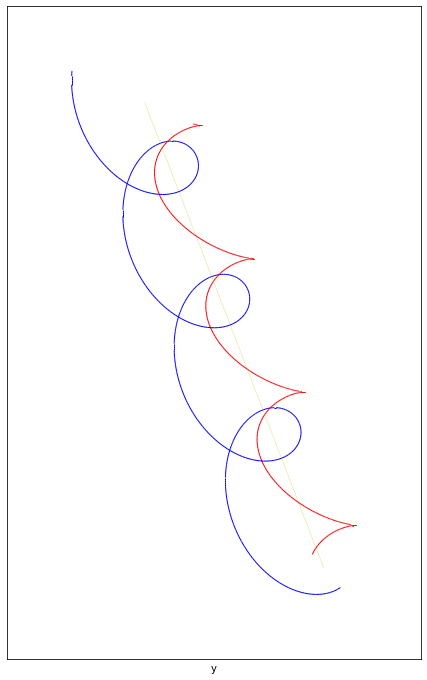

In [13]:
# fig = plt.figure(figsize=(12,12))
# ax = plt.subplot(1, 1, 1)
# ax.set_aspect('1')

# data_skip = len(pos1[0])//480

# xlim, ylim = plotLimsTwoBody(pos1, pos2)

# def init_func():
#     ax.clear()
#     plt.xlabel('x')
#     plt.xlabel('y')
#     plt.xlim(xlim)
#     plt.ylim(ylim)
#     plt.tick_params(left = False, right = False , labelleft = False ,
#                 labelbottom = False, bottom = False)

# def update_plot(i):
#     ax.plot(pos1[0][i:i+data_skip],pos1[1][i:i+data_skip],'b',lw=1)
#     ax.plot(pos2[0][i:i+data_skip],pos2[1][i:i+data_skip],'r',lw=1)
#     ax.plot(posCM[0][i:i+data_skip],posCM[1][i:i+data_skip],'y:',lw=0.5)
#     return ax,

# animation = FuncAnimation(fig, update_plot, frames=range(0, len(pos1[0]), data_skip), init_func=init_func, interval = 24, blit=False)
# animation.save('./Animations/EIH3_anim.gif', dpi=200, writer='ffmpeg')
# plt.show()


# EINSTEIN, INFELD and HOFMANN
With $\mathbf r = \mathbf r_1 - \mathbf r_2$ and $r = \sqrt{\mathbf r \cdot \mathbf r}$ and $\dot{\mathbf x}_{i_\perp} = \dot{\mathbf x}_i - \mathbf r (\dot{\mathbf x}_i \cdot \mathbf r)/r^2$, the Newton and the Einstein-Infeld-Hofmann lagrangians for the two-body problem are

$$ \mathcal{L}_\mathrm{N} = \frac 1 2 \sum_{i=1}^2 m_i \dot {\mathbf x}_i^2 - \frac{G m_1 m_2}{r}$$

$$ \mathcal{L}_\mathrm{EIH} = \mathcal L_\mathrm{N} + \frac 1 8 \sum_{i=1}^2 m_i \dot{\mathbf x}_i^4 + \frac{G m_1 m_2}{2 r } \left[3 (\dot {\mathbf x}_1^2 + \dot {\mathbf x_2}^2) - 8 \dot {\mathbf x}_1 \cdot \dot {\mathbf x}_2 + \dot{\mathbf x}_{1_\perp} \cdot \dot{\mathbf x}_{2_\perp}\right] - \frac{G^2 m_1 m_2 (m_1 + m_2)}{2 r^2}$$

$$\mathcal{L}_\mathrm{EIH} = \frac 1 2 \sum_{i=1}^2 m_i \dot {\mathbf x}_i^2 - \frac{G m_1 m_2}{r} + \frac 1 8 \sum_{i=1}^2 m_i \dot{\mathbf x}_i^4 + \frac{G m_1 m_2}{2 r } \left[3 (\dot {\mathbf x}_1^2 + \dot {\mathbf x_2}^2) - 8 \dot {\mathbf x}_1 \cdot \dot {\mathbf x}_2 + \dot{\mathbf x}_{1_\perp} \cdot \dot{\mathbf x}_{2_\perp}\right] - \frac{G^2 m_1 m_2 (m_1 + m_2)}{2 r^2}$$